In [3]:
import pandas as pd
from io import StringIO
import requests
from plotnine import *
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n,
    sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction)

In [4]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [5]:
response = requests.get(url)

In [6]:
data = StringIO(response.text)
df = pd.read_csv(data)

In [7]:
df = df.rename(columns={
    'petal.length': 'petal_length',
    'petal.width': 'petal_width',
    'sepal.length': 'sepal_length',
    'sepal.width': 'sepal_width'
})
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


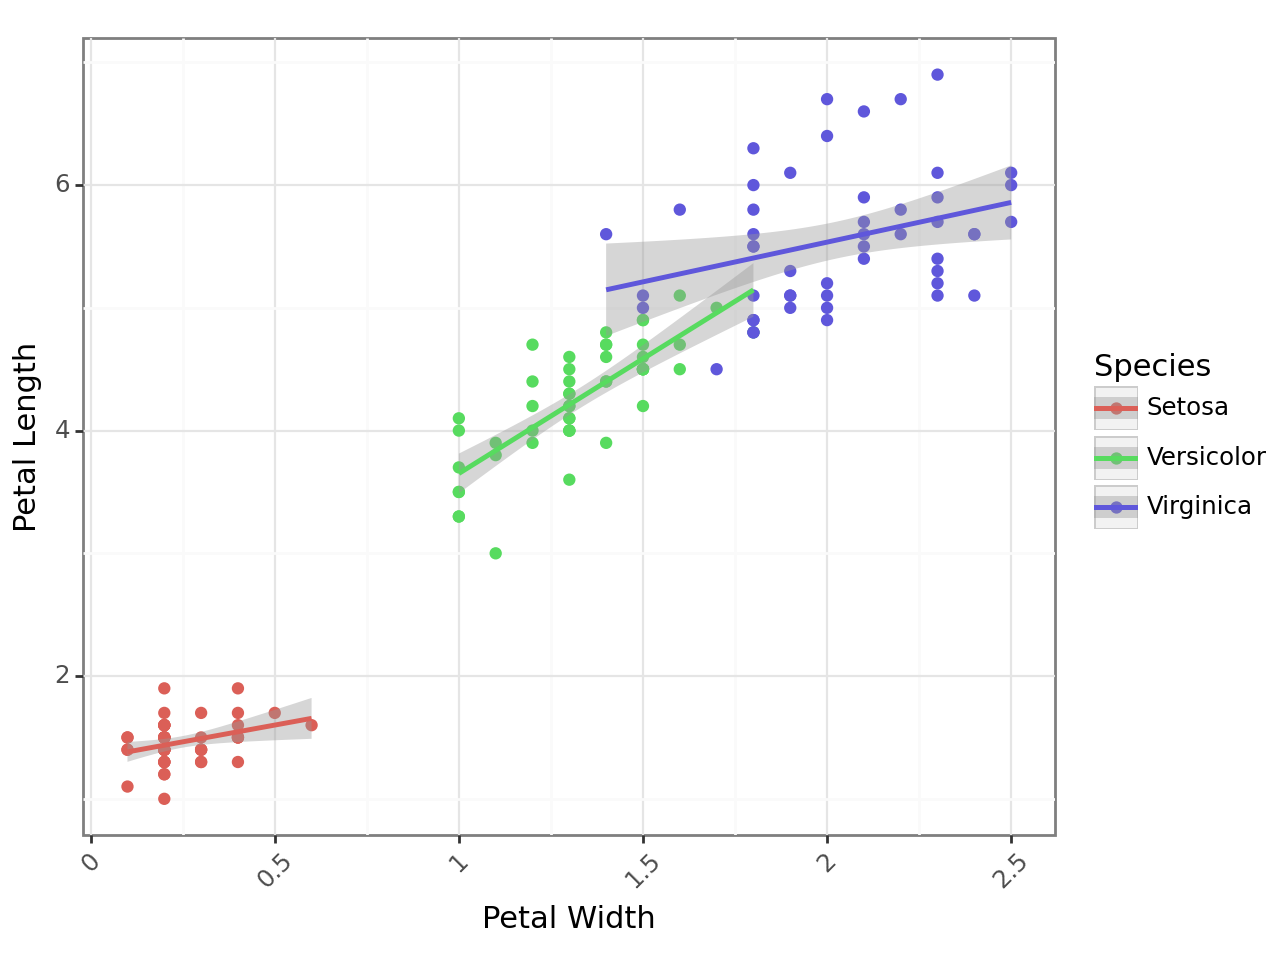

<Figure Size: (640 x 480)>

In [9]:
# R grammar in Python ggplot example
(ggplot(df, aes('petal_width', 'petal_length', color='variety')) +
  geom_point() +
  stat_smooth(method='lm') +
 theme_bw() + 
 theme(axis_text_x=element_text(angle=45)) +
 labs(x="Petal Width", y="Petal Length", color = 'Species')
)

In [10]:
df_d = DplyFrame(df)

In [11]:
df_d >> sift(X.petal_length > 5, X.petal_width < 4) >> arrange(X.petal_width)


,sepal_length,sepal_width,petal_length,petal_width,variety
134,6.1,2.6,5.6,1.4,Virginica
133,6.3,2.8,5.1,1.5,Virginica
83,6.0,2.7,5.1,1.6,Versicolor
129,7.2,3.0,5.8,1.6,Virginica
137,6.4,3.1,5.5,1.8,Virginica
125,7.2,3.2,6.0,1.8,Virginica
116,6.5,3.0,5.5,1.8,Virginica
108,6.7,2.5,5.8,1.8,Virginica
149,5.9,3.0,5.1,1.8,Virginica
107,7.3,2.9,6.3,1.8,Virginica


In [37]:
from dplython import (DplyFrame, X, diamonds, select, mutate, arrange, 
                      sift, group_by, summarize, rename)


In [41]:
(df >> 
 select(X.carat, X.cut, X.price) >> sift(X.carat > 0.29))

,carat,cut,price
4,0.31,Good,335


In [43]:
df = df.rename(columns={
    'petal.length': 'petal_length',
    'petal.width': 'petal_width',
    'sepal.length': 'sepal_length',
    'sepal.width': 'sepal_width'
})

In [44]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
